In [2]:
import numpy as np
import itertools
import math
import matplotlib.pyplot as plt
import qiskit as qk
from qiskit import QuantumCircuit
#from qiskit import Aer

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.providers.aer import QasmSimulator
import qiskit_aer.noise as noise

#My imports
from coolingUnitary import CoolingUnitary
from mirrorProtocol import MirrorProtocol
from pairingPartnerAlgorithm import PairingPartnerAlgorithm
from minimalWorkProtocol import MinimalWorkProtocol
from utils import *

In [9]:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate nG0 a, b, c {
  x c;
  x b;
  ccx c, b, a;
  x c;
  x a;
  ccx c, a, b;
  ccx a, b, c;
  ccx c, a, b;
  x a;
  x c;
  ccx c, b, a;
  x b;
  x c;
}

qreg q[3];
creg c[3];

barrier q[0];
barrier q[1];
barrier q[2];
x q[1];
x q[2];
ccx q[2], q[1], q[0];
x q[1];
x q[2];
barrier q[0];
barrier q[1];
barrier q[2];
x q[0];
x q[2];
ccx q[0], q[2], q[1];
x q[0];
x q[2];
barrier q[0];
barrier q[1];
barrier q[2];
x q[0];
ccx q[0], q[1], q[2];
x q[0];
barrier q[0];
barrier q[1];
barrier q[2];
x q[0];
x q[2];
ccx q[0], q[2], q[1];
x q[0];
x q[2];
barrier q[0];
barrier q[1];
barrier q[2];
x q[1];
x q[2];
ccx q[2], q[1], q[0];
x q[1];
x q[2];

// @columns [0,0,0,1,1,2,3,3,4,4,4,5,5,6,7,7,8,8,8,9,10,11,12,12,12,13,13,14,15,15,16,16,16,17,17,18,19,19]

"""
circuit = QuantumCircuit.from_qasm_str(qasm)

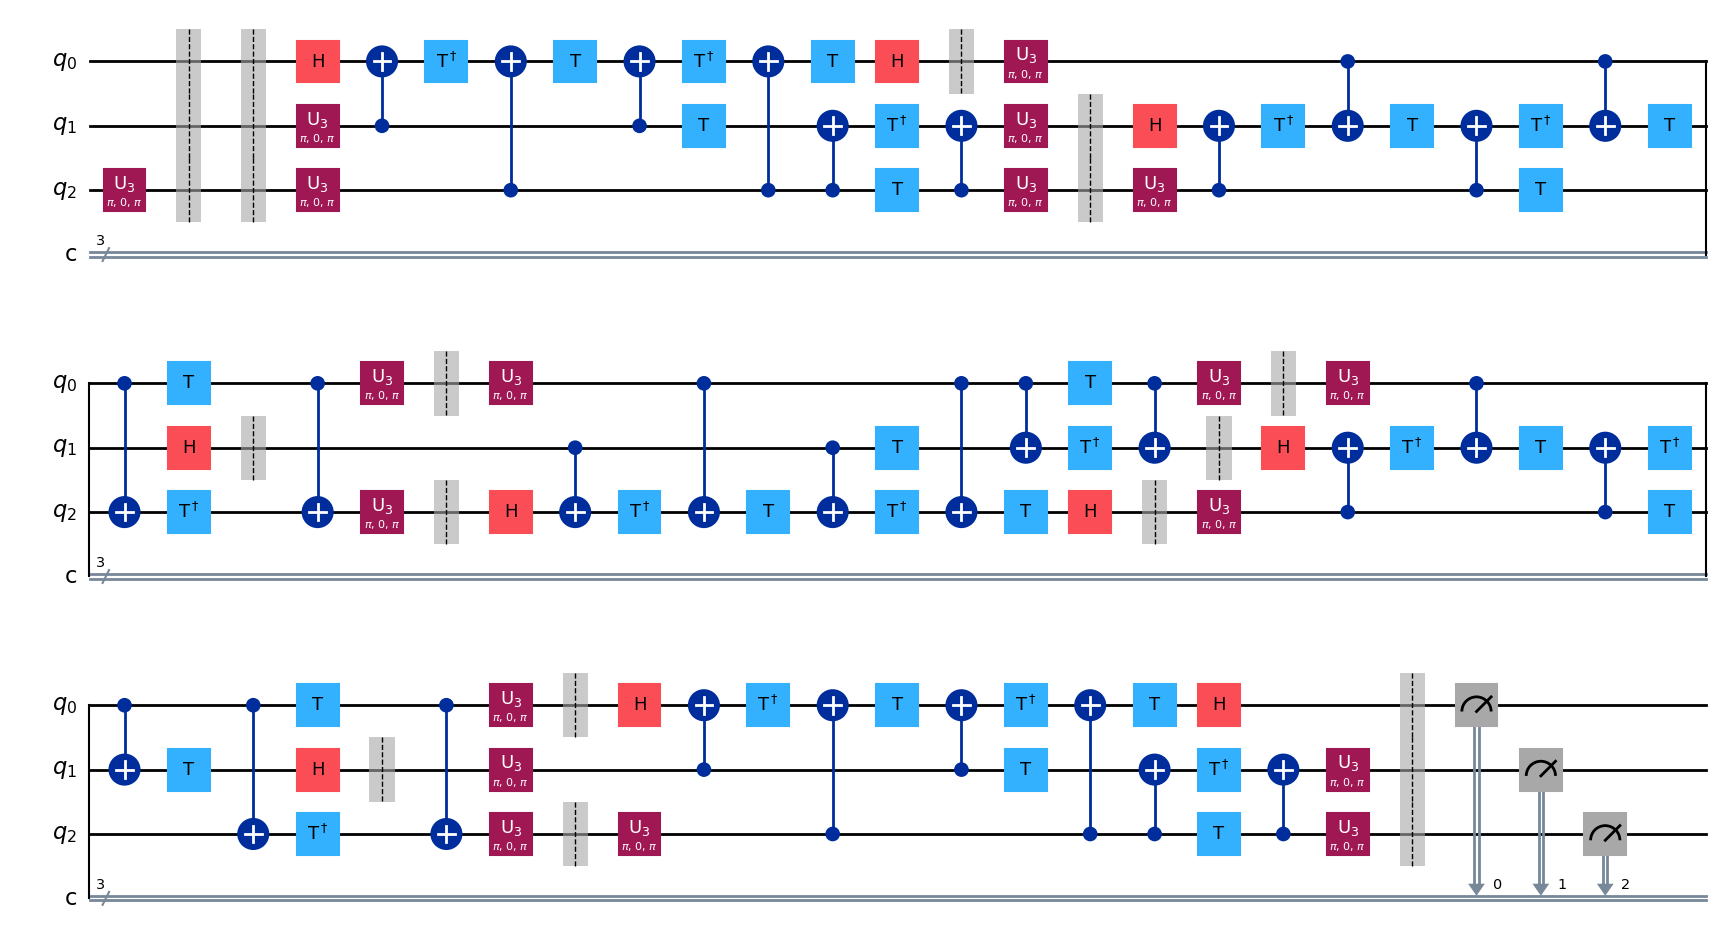

In [13]:
n = 3
num_circs = 2**n
circuits = []
q_regs = qk.QuantumRegister(n, 'q')
c_regs = qk.ClassicalRegister(n, 'c')
#make circuits
for i in range(num_circs):
    total_circ = qk.QuantumCircuit(q_regs, c_regs)
    #prepare initial state
    bitstring = format(i,'b').zfill(n)
    idx = 0
    for bit in bitstring[::-1]:
    #for bit in bitstring:
        if (bit == '1'):
            total_circ.x(idx)
        idx += 1
    total_circ.barrier()
    #add cooling circuits
    #total_circ.compose(circuit, qubits=[q_regs[0],q_regs[1],q_regs[2]], inplace=True)
    total_circ.compose(circuit, inplace=True)
    #total_circ.compose(cooling_circuit, qubits=[q_regs[0],q_regs[1],q_regs[2],q_regs[3],q_regs[4]], inplace=True)
    #add measurement
    total_circ.barrier()
    total_circ.measure(range(n), c_regs)
    circuits.append(total_circ)

circuits[4].decompose().draw("mpl")

In [15]:
service = QiskitRuntimeService()
sim_backend = service.backend("ibmq_qasm_simulator")
qasm_sim = AerSimulator()

In [16]:
counts = []
for i in range(num_circs):
    result = qasm_sim.run(circuits[i]).result()
    counts.append(result.get_counts())
    print(format(i,'b').zfill(n) + " " + str(counts[i]))
#counts

000 {'000': 1024}
001 {'110': 1024}
010 {'010': 1024}
011 {'011': 1024}
100 {'100': 1024}
101 {'101': 1024}
110 {'001': 1024}
111 {'111': 1024}


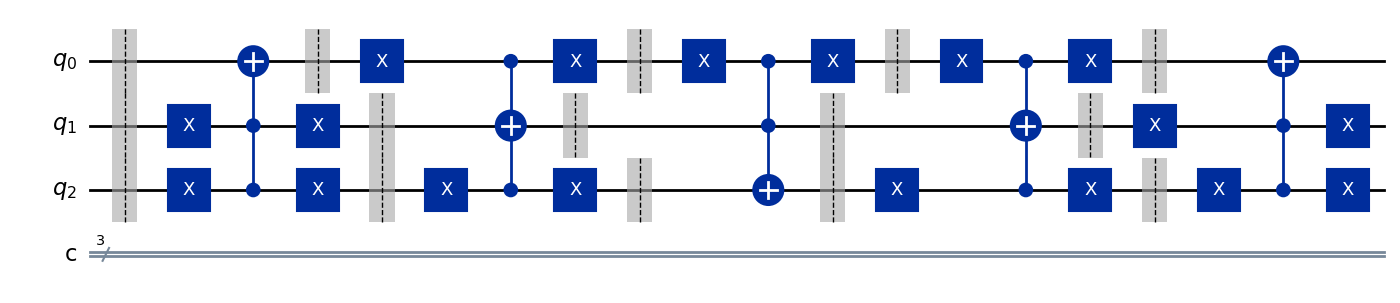

In [17]:
circuit.draw('mpl')

In [8]:
provider = QiskitRuntimeService()
service = QiskitRuntimeService()
provider.backends()

[<IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>]

In [9]:
provider = QiskitRuntimeService()
service = QiskitRuntimeService()
sim_backend = service.backend("ibmq_qasm_simulator")
qasm_sim = AerSimulator()

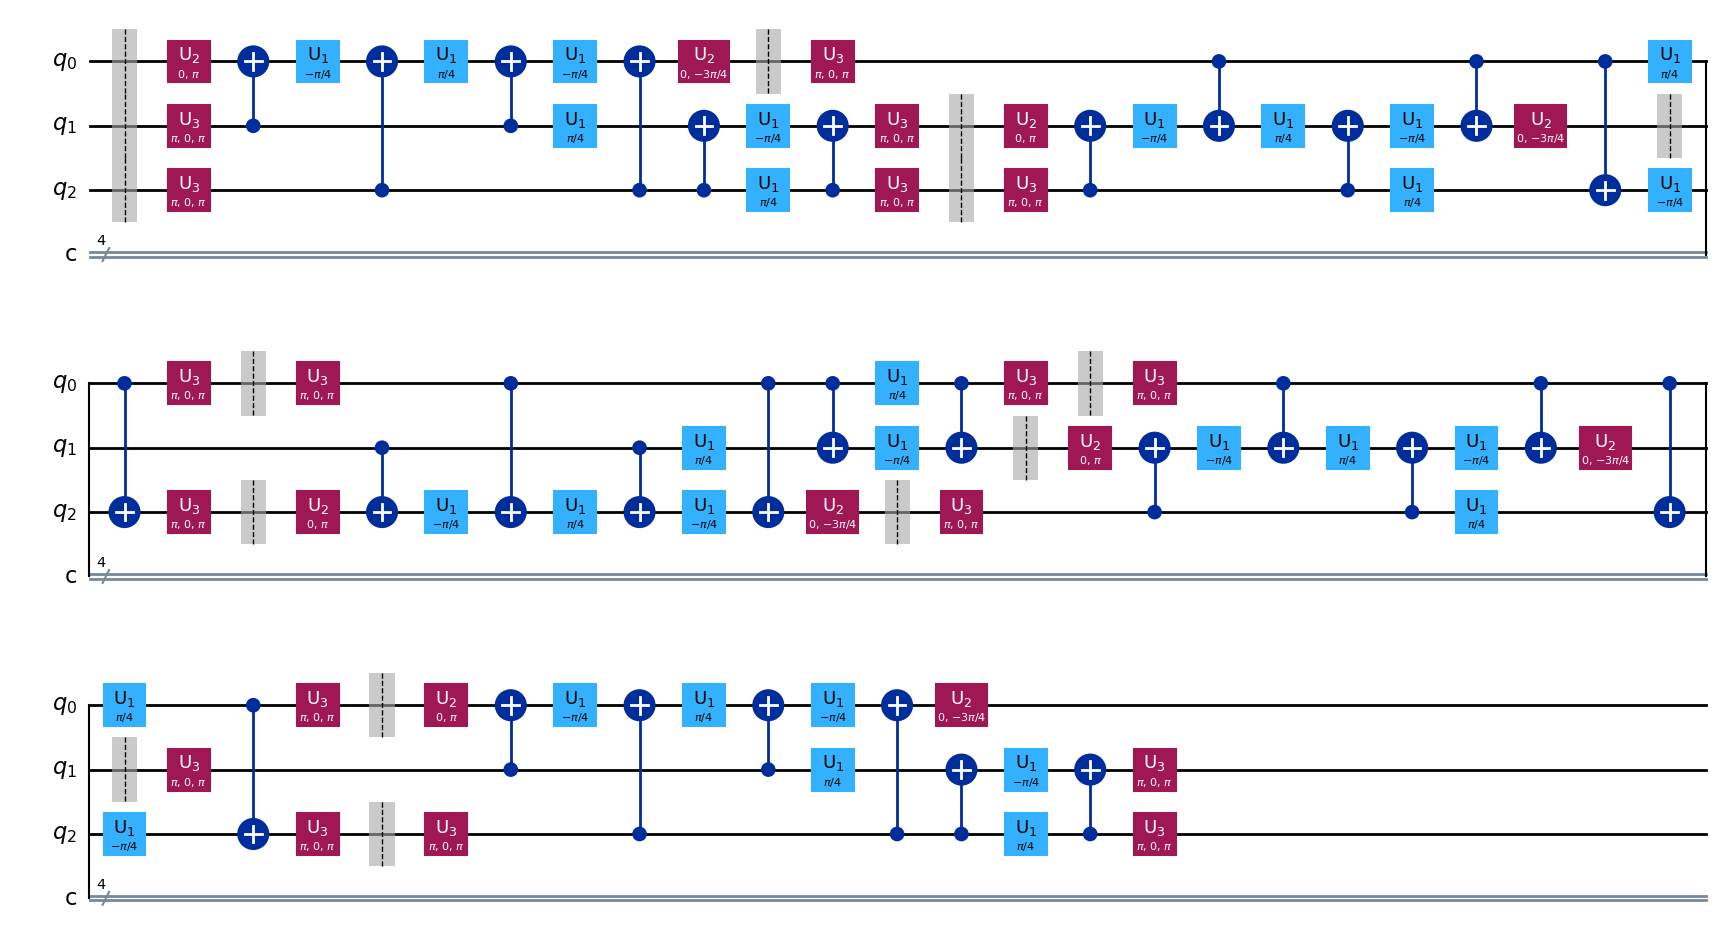

In [13]:
#a2 = qk.transpile(circuit, backend=sim_backend)
a2 = qk.transpile(circuit, backend=qasm_sim, basis_gates=['u1','u2','u3','cx'])
a2.draw('mpl')

In [ ]:
#circs[0].count_ops()